# VERIFICA LEGGE DI OHM

OBIETTIVO: verificare V=RI

PROCEDIMENTO: resistenza fissata, variata tensione e misurata corrente

In [1]:
import pandas as pd # nicolo
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'VRI.csv'

from interpolazione import RettaInterpolata

In [2]:
fr = pd.read_csv(FILE)

R = 2 * 10**6 # usata resistenza 2MΩ
V = np.array(fr['V'])
I = np.array(fr['I(uA)']) * 10**-6 # micro ampere

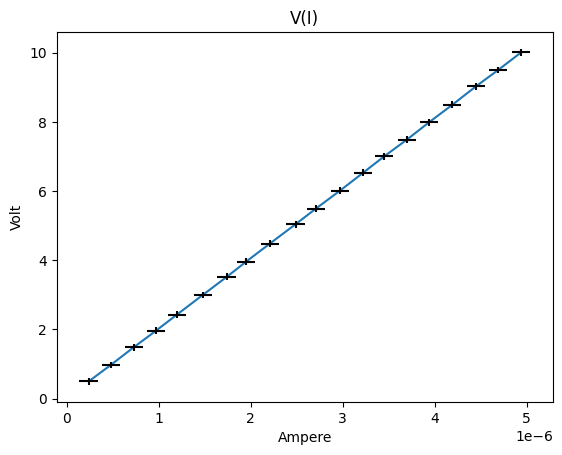


linearità A + BX
    
A: -0.0015949412307977447 
B: 2026954.5664458114
sigmaA: 0.0032268422574736008
sigmaB: 1091.7685276147008

sigmaY: 0.01    
chiquadro ridotto: 0.39
df: 18
pvalue: 100.0%


In [3]:
r = RettaInterpolata(I,V,0.01)
plt.title('V(I)')
plt.plot(r.X,r.Y)
plt.errorbar(I,V,yerr=0.1,xerr=0.0000001,fmt=' ',color='red',ecolor='black')
plt.ylabel('Volt')
plt.xlabel('Ampere')
plt.show()
print(r)